# Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Preprocessing & Cleaning

### Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/MLD/Files/accepted_2007_to_2018Q4.csv'
df = pd.read_csv(file_path, low_memory=False)

#Sample 100,000 rows
df = df.sample(n=100000, random_state=42).copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Cleaning

In [3]:
#Remove columns with over 50% missing values
missing = df.isnull().mean()
df = df.drop(columns=missing[missing > 0.5].index)

#Remove irrelevant columns
df = df.drop(columns=['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state'], errors='ignore')

### Target Column Creation

In [4]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)
df = df.drop(columns=['loan_status'])

### Encoding Categorical Features

In [10]:
df = pd.get_dummies(df, drop_first=True)

#Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['default'])
y = df['default']

#Drop any rows with NaNs in features
X = X.dropna()
y = y.loc[X.index]

### Train/Test Split & Scaling

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

### Logistic Regression

Confusion Matrix:
[[2700   10]
 [   9  789]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2710
           1       0.99      0.99      0.99       798

    accuracy                           0.99      3508
   macro avg       0.99      0.99      0.99      3508
weighted avg       0.99      0.99      0.99      3508


ROC AUC Score: 0.9983709273182957


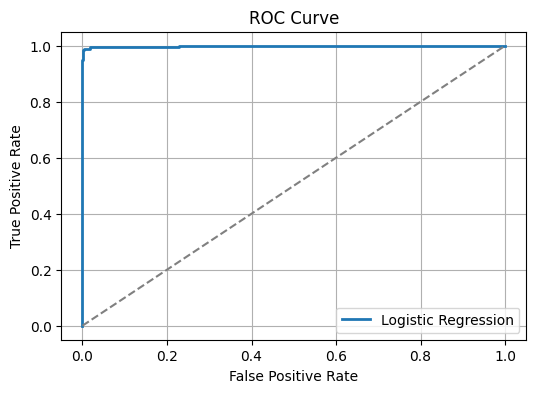

In [12]:
#Initialize and train the model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

#Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

#Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="Logistic Regression", linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### Support Vector Machine (SVM)

Confusion Matrix:
[[2661   49]
 [  55  743]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2710
           1       0.94      0.93      0.93       798

    accuracy                           0.97      3508
   macro avg       0.96      0.96      0.96      3508
weighted avg       0.97      0.97      0.97      3508


ROC AUC Score: 0.9922361253687725


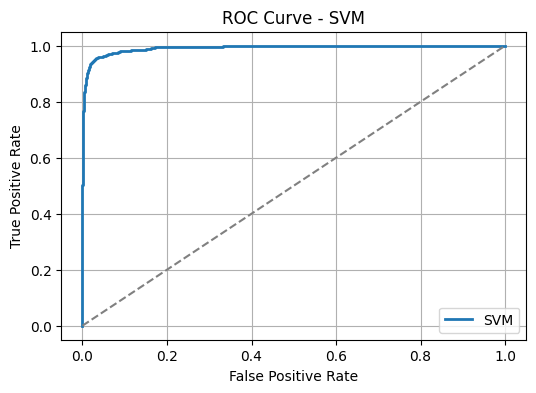

In [15]:
#Initialize and train the model
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

#Predict
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

#Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_svm))

#Plot ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label="SVM", linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid(True)
plt.show()

### Multi-Layer Perception (MLP)

Confusion Matrix:
[[2697   13]
 [  24  774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2710
           1       0.98      0.97      0.98       798

    accuracy                           0.99      3508
   macro avg       0.99      0.98      0.98      3508
weighted avg       0.99      0.99      0.99      3508


ROC AUC Score: 0.9973869174781973


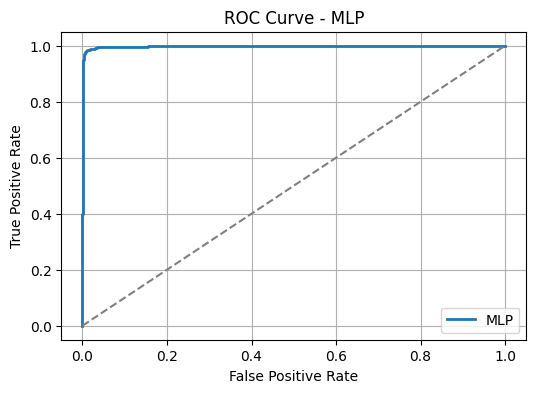

In [18]:
#Initialize and train the model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

#Predict
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

#Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_mlp))

#Plot ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
plt.figure(figsize=(6, 4))
plt.plot(fpr_mlp, tpr_mlp, label="MLP", linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP")
plt.legend()
plt.grid(True)
plt.show()